# 1. Distance Modulus

#### (a) Use Eq. 3 to numerically compute the standard cosmology curve (solid black line) in Fig. 1a. (use common approximation with zhel → zcmb in the “1 + z” prefactor).

Distance Modulus:

$
\mu = 5 \log_{10} \left( \frac{D_L}{10 \text{ pc}} \right)
$

Luminoscity Distance: 

$
D_L = \frac{c}{H_0} (1 + z) \int_0^{z} \frac{dz'}{E(z')}
$

$
E(z) = \left[ \Omega_{\text{DE}}(1 + z)^{3(1+w)} + \Omega_M (1 + z)^3 \right]^{1/2}
$

Assumptions:

- $\Omega_K = 0$

Givens: 

- $H_0 = 70$ km/s/Mpc
- $c = 2.998 \times 10^5$ km/s is the speed of light
- $w = -1$ 
    - ccosmological constant (informs that energy density remians constant over time)

Looked Up On My Own:

- $\Omega_M = 0.3$ (matter density - current)
- $\Omega_{\text{DE}} = 0.7$ (dark energy density - current) 

Inferred from Figure 1 Plot a: 

- $z_\text{CMB}$ ranging from 0 to 2




/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_51247/1356318961.py:31: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(DL_pc / 10)


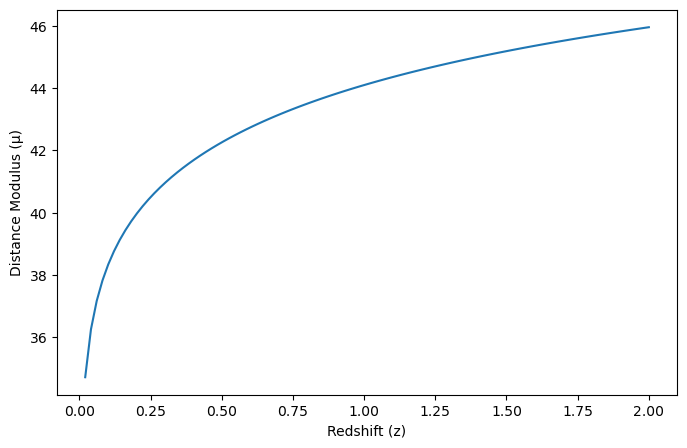

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
c = 2.998e5 # km/s
H0 = 70  # km/s/Mpc
Omega_M = 0.3
Omega_DE = 0.7
w = -1 

## USING SCIPY QUAD FUNCTION TO INTEGRATE ##

# Step 1: Define the function to integrate

def integrand(z):
    return 1 / np.sqrt(Omega_DE * (1 + z) ** (3 * (1 + w)) + Omega_M * (1 + z) ** 3)

# Step 2: Compute luminosity distance
# NOTE: return value in Mpc

def luminosity_distance(z):
    integral, error_est = quad(integrand, 0, z)
    return (c / H0) * (1 + z) * integral  # in Mpc

# Step 3: compute distance modulus
# Note the conversion factor 1e6 to convert Mpc to parsecs

def distance_modulus(z):
    DL_pc = luminosity_distance(z) * 1e6  # Convert to parsecs
    return 5 * np.log10(DL_pc / 10)

# Step 4: Define Limits of Integration 
z_values = np.linspace(0, 2, 100)

# Step 5: Command to compute integral 
mu = np.array([distance_modulus(z) for z in z_values])

## PLOTTING ##

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(z_values, mu, label=r'$\Omega_M=0.3, \Omega_\Lambda=0.7, w=-1$')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.show()


#### (b) Reproduce the dashedcurves in Fig. 1a

/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_51247/4022775812.py:6: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(D_L_DE_1 / 10)
/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_51247/4022775812.py:15: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(D_L_M_1 / 10)
/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_51247/4022775812.py:25: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(D_L_K_1 / 10)


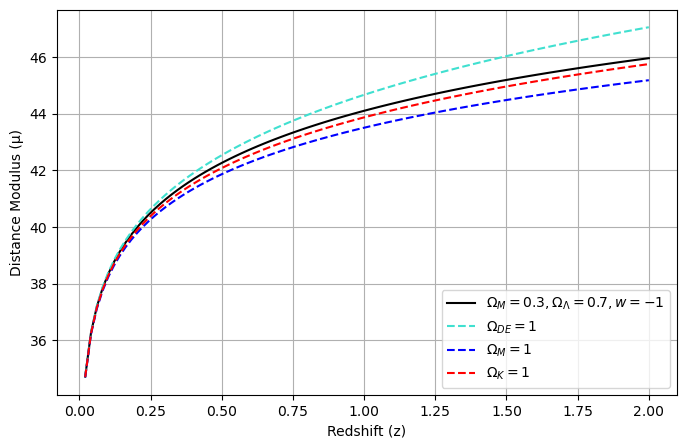

In [2]:
## OMEGA DE = 1 ##

def funct_mu_DE_1(z):
    # 1e6 to convert to parsecs
    D_L_DE_1 = (c / H0) * (1 + z) * z * 1e6
    return 5 * np.log10(D_L_DE_1 / 10)  

mu_DE_1 = np.array([funct_mu_DE_1(z) for z in z_values])

## OMEGA M = 1 ##

def funct_mu_M_1(z):
    # 1e6 to convert to parsecs
    D_L_M_1 = (c / H0) * (1 + z) * 2 * (1 - (1 + z) ** (-1 / 2)) * 1e6
    return 5 * np.log10(D_L_M_1 / 10)


mu_M_1 = np.array([funct_mu_M_1(z) for z in z_values])

## OMEGA K = 1 ##

def funct_mu_K_1(z):
    # 1e6 to convert to parsecs
    D_L_K_1 = (c / H0) * (1 + z) * np.log(1+z) * 1e6
    return 5 * np.log10(D_L_K_1 / 10)

mu_K_1 = np.array([funct_mu_K_1(z) for z in z_values])

plt.figure(figsize=(8, 5))
plt.plot(z_values, mu, color='black', label=r'$\Omega_M=0.3, \Omega_\Lambda=0.7, w=-1$')
plt.plot(z_values, mu_DE_1, color='turquoise', linestyle='--', label=r'$\Omega_{DE}=1$')
plt.plot(z_values, mu_M_1, color='blue', linestyle='--', label=r'$\Omega_M=1$')
plt.plot(z_values, mu_K_1, color='red', linestyle='--', label=r'$\Omega_K=1$')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.legend(loc='lower right')
plt.grid()
plt.show()

### (d) Using Eq. 3, numerically compute dμ/dw vs. redshift as shown in Fig. 1b.

We will use the standard model where $\Omega_{M} = 0.3$ and $\Omega_{DE} = 0.7$ and w = -1

NOTE: because we are computing dmu, dw for a fixed redhsift z (which varies on the horizontal axis), we will have to redefine the standard model function in terms of z and w. 

/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_51247/549597385.py:19: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(DL * 1e6 / 10)
/Users/pittsburghgraduatestudent/miniforge3/envs/mwv/lib/python3.11/site-packages/scipy/misc/_common.py:144: RuntimeWarning: invalid value encountered in scalar add
  val += weights[k]*func(x0+(k-ho)*dx,*args)
/Users/pittsburghgraduatestudent/miniforge3/envs/mwv/lib/python3.11/site-packages/scipy/misc/_common.py:144: RuntimeWarning: invalid value encountered in scalar multiply
  val += weights[k]*func(x0+(k-ho)*dx,*args)


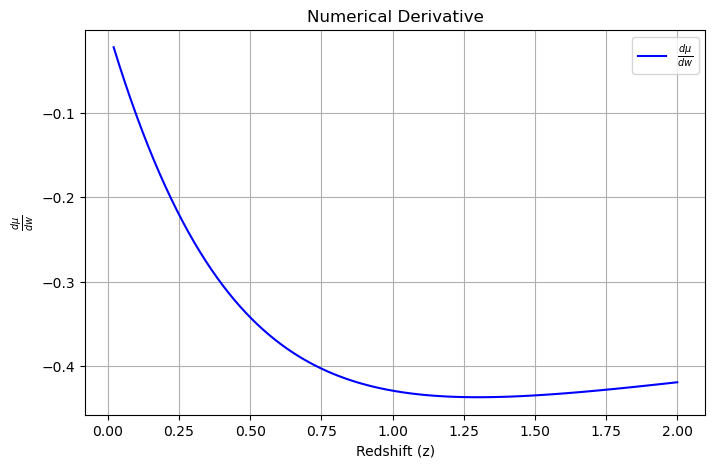

In [3]:
from scipy.misc import derivative

# Dimensionless Hubble Parameter
def funct_E(z, w):
    return np.sqrt(Omega_DE * (1 + z)**(3 * (1 + w)) + Omega_M * (1 + z)**3)

# Luminosity distance
def funct_D_L(z, w):
    # lambda designates which variable to integrate over
    # w treated like a fixed parameter in this case. 
    integral, _ = quad(lambda zp: 1 / funct_E(zp, w), 0, z) 
    DL = (c / H0) * (1 + z) * integral  # in Mpc
    return DL

# Distance modulus mu
def funct_mu_w_z(w, z):
    #1e6 to convert Mpc to parsecs
    DL = funct_D_L(z, w)
    return 5 * np.log10(DL * 1e6 / 10) 

## Derivative of mu with respect to w 
# we are evaluating the derivative at w = -1 which is the value of w for 
# the standard model. 
# Conceptually, we are defnint a fucntion wher z is an input and once that
# value is input and fixed, we do a numerical derivative with respect to w.
def dmu_dw(z):
    return derivative(lambda w: funct_mu_w_z(w, z), -1, dx=1e-4, order=5)

# Compute d(mu)/dw for a range of redshifts
dmu_dw_values = [dmu_dw(z) for z in z_values]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(z_values, dmu_dw_values, label=r"$\frac{d\mu}{dw}$", color='blue')
plt.xlabel("Redshift (z)")
plt.ylabel(r"$\frac{d\mu}{dw}$")
plt.title(r"Numerical Derivative")
plt.grid(True)
plt.legend()
plt.show()


### Part (d) analysis: 
Low z = universe is dominated by hubble flow. d $\mu$ /dw has minnimal sensitivity. 
Intermiedate z = greatest slope change (most model focus on the this region due to its sensitivity of measuring cosmic parameters. 
High z = matter dominant, dark energy effects are overpowered.

### Part (g): n Eq. 2 the radiation term, Ωr(1+z)4, is left out. Show that the µ-error from this approximation is ∼ 10−5 at low redshift, and increases to 6 × 10−5 at redshift z = 2.


# Luminosity Distance Calculation

The luminosity distance in a flat universe is given by:

$$
d_L = \frac{c}{H_0} (1 + z) \int_0^z \frac{dz'}{\sqrt{\Omega_m (1+z')^3 + \Omega_{\Lambda} (1+z')^{3(1+w)} + \Omega_r (1+z')^4}}
$$

where:
- $ c = 2.998 \times 10^{5} $ km/s is the speed of light,
- $ H_0 = 70 $ km/s/Mpc is the Hubble constant,
- $ \Omega_m = 0.3 $ is the matter density,
- $ \Omega_{\Lambda} = 0.7 $ is the dark energy density,
- $ \Omega_r = 5.04 \times 10^{-5} $ is the radiation density,
- $ w = -1 $ for a cosmological constant.

Using numerical integration, we compute $ d_L $ for scenarios where the $\Omega_r$ term 


In [4]:
from scipy.integrate import quad
from IPython.display import display, Math


# =========================
# DOING MEASUREMENTS FOR z = 0.01
# =========================

# Define constants
c = 2.998e5  # Speed of light in km/s
Ho = 70  # Hubble constant in km/s/Mpc
Omega_m = 0.3
Omega_de = 0.7
w = -1
Omega_r = 5.04e-5
zlow = 0.05  # Upper limit of integration
# Define the integrand function
def integrand(z):
    return 1.0 / np.sqrt(Omega_m * (1 + z)**3 + Omega_de * (1 + z)**(3 * (1 + w)) + Omega_r * (1 + z)**4)

# Perform numerical integration
integral, error = quad(integrand, 0, zlow)

# Compute luminosity distance
dL_low = (c / Ho) * (1 + zlow) * integral * 1e6 # conversion to parsecs

mu_z_low = 5 * np.log10(dL_low / 10)

print("mu_z_0.05", mu_z_low)


# Compute integral without radiation term
def integrand_no_rad(z):
    return 1.0 / np.sqrt(Omega_m * (1 + z)**3 + Omega_de * (1 + z)**(3 * (1 + w)))

integral_no_rad, error_no_rad = quad(integrand_no_rad, 0, zlow)

# Compute luminosity distance without radiation term
dL_no_rad = (c / Ho) * (1 + zlow) * integral_no_rad * 1e6   # conversion to parsecs

mu_z_low_no_rad = 5 * np.log10(dL_no_rad / 10)

print("mu_z_0.05", mu_z_low_no_rad)

# Compute the difference in distance modulus
delta_mu = mu_z_low - mu_z_low_no_rad
print("delta_mu_z_0.05", delta_mu)

# =========================
# REPEATING MEASUREMENTS FOR z = 2
# =========================

zhigh = 2  # Upper limit of integration

# Perform numerical integration
integral_high, error_high = quad(integrand, 0, zhigh)

# Compute luminosity distance
dL_high = (c / Ho) * (1 + zhigh) * integral_high * 1e6 # conversion to parsecs

mu_z_high = 5 * np.log10(dL_high / 10)

print("mu_z_2", mu_z_high)

## Compute without radiation term
integral_no_rad_high, error_no_rad_high = quad(integrand_no_rad, 0, zhigh)

# Compute luminosity distance without radiation term
dL_no_rad_high = (c / Ho) * (1 + zhigh) * integral_no_rad_high * 1e6   # conversion to parsecs

mu_z_high_no_rad = 5 * np.log10(dL_no_rad_high / 10)

print("mu_z_2_no_rad", mu_z_high_no_rad)

# Compute the difference in distance modulus

delta_mu_high = mu_z_high - mu_z_high_no_rad
print("delta_mu_z_2", delta_mu_high)


mu_z_0.05 36.73458597570051
mu_z_0.05 36.73464502243421
delta_mu_z_0.05 -5.904673369627744e-05
mu_z_2 45.957014724625424
mu_z_2_no_rad 45.95725188063185
delta_mu_z_2 -0.00023715600642759682


### Part H: In the Planck 2018 cosmology results,2 the curvature term is Ωk = 0.001 ± 0.002, consistent with zero as assumed for E(z) in Eq. 2. Allowing for a 2σ ﬂuctuation, Ωk = 0.005, show that the µ-shift reaches a maximum of 0.0022 mag at z ' 1, and then gradually decreases, reaching zero shift at z ∼ 3. Note that for non-zero curvature, sinh or sin is needed in Eq, 2.


So to solve this problem we will evaluate $\mu$ with the curvature term in E(z) and subtract from it $\mu$ without the curvature term in E(z).

When the curvature term is introduced, DL takes on a whole new definition:
(taken from wikipedia: https://en.wikipedia.org/wiki/Distance_measure?utm_source=chatgpt.com)

$$
D_L = \frac{c}{Ho}\frac{(1+z)}{\sqrt{|\Omega_k|}} \sinh \left( \sqrt{|\Omega_k|} \int_0^z \frac{dz'}{E(z')} \right), \quad \text{for } \Omega_k > 0
$$

where:

$
E(z) = \sqrt{\Omega_M (1+z)^3 + \Omega_{\text{DE}} + \Omega_k (1+z)^2}
$

remember w = -1

Another interesting definition is the comoving distance here:

$
D_C = \frac{c}{H_0} \int_0^z \frac{dz’}{E(z’)}
$

Luminoscity distance definition remains unchanged:

$
\mu = 5 \log_{10} \left( \frac{D_L}{10 \text{ pc}} \right)
$

However we must remember that the Luminoscity distance equation wtih no curvature is:

$$
D_L = \frac{c (1+z)}{H_0} \int_0^z \frac{dz'}{E(z')}
$$

where

$
E(z) = \sqrt{\Omega_M (1+z)^3 + \Omega_{\text{DE}}}
$






/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_51247/1103835871.py:30: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(luminosity_distance_curved(z) / 10)
/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_51247/1103835871.py:49: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(DL_no_k / 10)


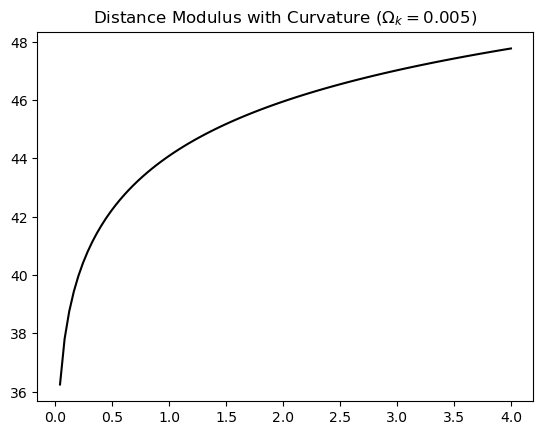

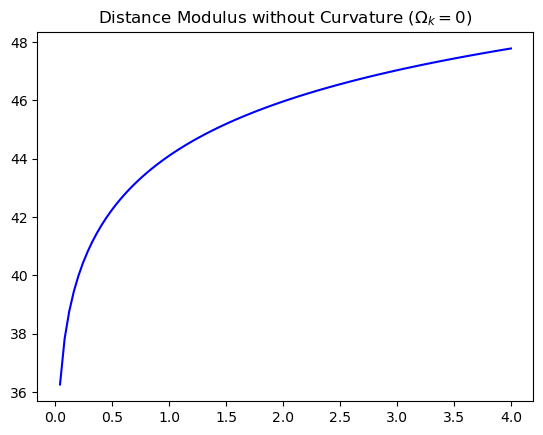

/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_51247/1103835871.py:71: RuntimeWarning: invalid value encountered in subtract
  plt.plot(z_values, mu_no_k_values - mu_curved_values, color='black')
/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_51247/1103835871.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


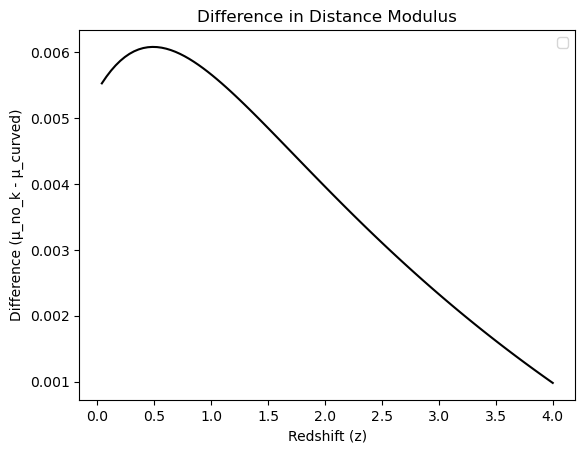

In [29]:
# Constants
c = 2.998e5  # Speed of light in km/s
H0 = 70  # Hubble constant in km/s/Mpc
Omega_M = 0.3
Omega_DE = 0.7
Omega_k = 0.005  # Positive curvature

# =========================================================================================
# Computing Distance Modulus (μ) with Curvature (Ω_k = 0.05) and without Radiation (Ω_r = 0)
# =========================================================================================


# Dimensionless Hubble parameter including curvature
def E_wit_k(z):
    return np.sqrt(Omega_M * (1+z)**3 + Omega_DE + Omega_k * (1+z)**2)

# Comoving distance integral
def comoving_distance(z):
    integral, _ = quad(lambda zp: 1 / E_wit_k(zp), 0, z)
    return integral  # in Mpc


# Luminosity distance with curvature using sinh (for Omega_k > 0)
def luminosity_distance_curved(z):
    Dc = comoving_distance(z)
    return (c / H0) * (1 + z) / (np.sqrt(Omega_k)) * np.sinh(np.sqrt(Omega_k) * Dc) * 1e6  # 1e6 to convert Mpc to parsecs

# Compute distance modulus at any given z with curvature
def mu_curved(z):
    return 5 * np.log10(luminosity_distance_curved(z) / 10)


# =========================================================================================
# Computing Distance Modulus (μ) without Curvature (Ω_k = 0) and without Radiation (Ω_r = 0)
# ==========================================================================================


def E_no_k(z):
    return np.sqrt(Omega_M * (1 + z)**3 + Omega_DE)

def luminosity_distance_no_k(z):
    integral, _ = quad(lambda zp: 1 / E_no_k(zp), 0, z)
    return (c / H0) * (1 + z) * integral * 1e6  # 1e6 to convert Mpc to parsecs

# Compute distance modulus at any given z with no curvature

def mu_no_k(z):
    DL_no_k = luminosity_distance_no_k(z)
    return 5 * np.log10(DL_no_k / 10)


# =========================================================================================
# Evaluation
# ==========================================================================================

#Define range of z values
z_values = np.linspace(0, 4, 100)

mu_curved_values = np.array([mu_curved(z) for z in z_values])
mu_no_k_values = np.array([mu_no_k(z) for z in z_values])

# =========================================================================================
# Plotting
# ==========================================================================================
plt.plot(z_values, mu_curved_values, color='black', label='Curved Model')
plt.title(r"Distance Modulus with Curvature ($\Omega_k = 0.005$)")
plt.show()
plt.plot(z_values, mu_no_k_values, color='blue', label='No Curvature Model')
plt.title(r"Distance Modulus without Curvature ($\Omega_k = 0$)")
plt.show()
plt.plot(z_values, mu_no_k_values - mu_curved_values, color='black')
plt.title("Difference in Distance Modulus")
plt.xlabel("Redshift (z)")
plt.ylabel("Difference (μ_no_k - μ_curved)")
plt.legend()
plt.show()




### Part(j) Using σz = 0.001 and standard cosmological parameters (ΩDE, ΩM, w) shown in Fig. 1b, numerically compute σexact µ = µ(z + 0.001) − µ(z) vs. redshift. Show that σapprox µ is within 1% of σ exact µ at low redshifts, is oﬀ by 8% at z = 1, and oﬀ by more than 20% at z = 2. Why is this approximation adequate for precision cosmology analyses?

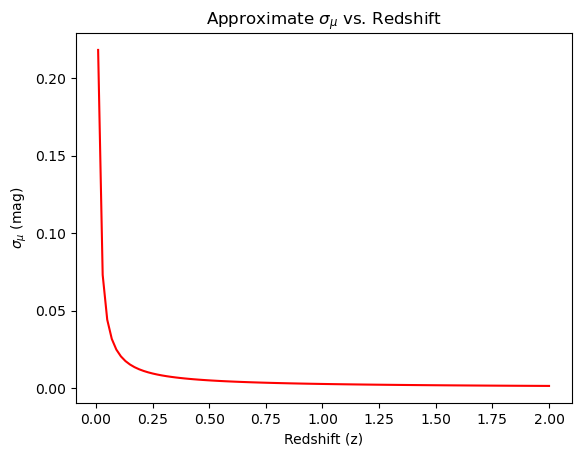

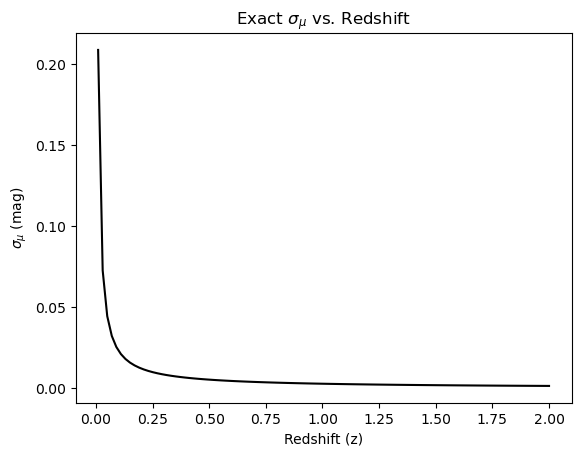

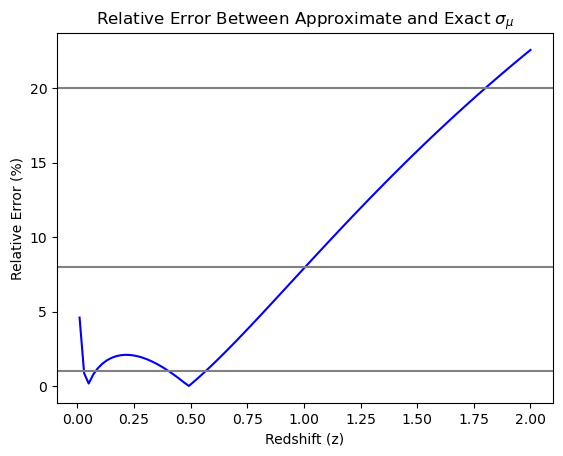

Relative Error at z=1: 7.91%
Relative Error at z=2: 22.57%


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ================================================
# Constants
# ================================================
c = 2.998e5  # Speed of light in km/s
H0 = 70  # Hubble constant in km/s/Mpc

## From figure 1B in the assignment 
Omega_M = 0.3
Omega_DE = 0.7
w = -1  

# ================================================
# Function of σ_aprox_μ(z) at σ_z = 0.001
# ================================================
def sigma_approx_mu(z):
    return (0.001 / z) * (5 / np.log(10)) * ((1+z) / (1+z/2))

# ================================================
# Plot of σ_aprox_μ(z) at σ_z = 0.001 vs z
# ================================================

z_values = np.linspace(0.01, 2, 100)
sigma_approx_values = np.array([sigma_approx_mu(z) for z in z_values])
plt.plot(z_values, sigma_approx_values, label=r"$\sigma_{\text{approx}, \mu}$", color='red')
plt.xlabel("Redshift (z)")
plt.ylabel(r"$\sigma_{\mu}$ (mag)")
plt.title("Approximate $\sigma_{\mu}$ vs. Redshift")
plt.show()


# ================================================
# Function of σ_exact_μ(z) (note: no need to provide σ_z)
# ================================================

# Dimensionless Hubble Parameter E(z)
def E(z):
    return np.sqrt(Omega_M * (1+z)**3 + Omega_DE * (1+z)**(3*(1+w)))

## Comoving Distance Integral
def comoving_distance(z):
    integral, _ = quad(lambda zp: 1 / E(zp), 0, z)
    return (c / H0) * integral  # Comoving distance in Mpc

## Luminosity Distance for a Flat Universe (no sinh function anymore)
# note: assuming a flat universe as we did in Part i.
def luminosity_distance(z):
    return (1+z) * comoving_distance(z)  # D_L in Mpc

## Function for the Distance Modulus
def distance_modulus(z):
    DL = luminosity_distance(z)
    DL_pc = DL * 1e6  # Convert Mpc to parsecs
    return 5 * np.log10(DL_pc / 10)

## Function for Exact σ_μ at σ_z = 0.001
def sigma_exact_mu(z):
    return distance_modulus(z + 0.001) - distance_modulus(z)

# ================================================
# Plot of σ_exact_μ(z)  vs z
# ================================================
sigma_exact_values = np.array([sigma_exact_mu(z) for z in z_values])
plt.plot(z_values, sigma_exact_values, label=r"$\sigma_{\text{exact}, \mu}$", color='black', linestyle='-')
plt.xlabel("Redshift (z)")
plt.ylabel(r"$\sigma_{\mu}$ (mag)")
plt.title("Exact $\sigma_{\mu}$ vs. Redshift")
plt.show()


# ================================================
# Compute Relative Error
# ================================================
relative_error = np.abs(sigma_exact_values - sigma_approx_values) / sigma_exact_values * 100

# ================================================
# Plot Relative Error
# ================================================
plt.plot(z_values, relative_error, label="Relative Error (%)", color='blue')

plt.axhline(y=1, color='gray', label="1%")
plt.axhline(y=8, color='gray', label="8%")
plt.axhline(y=20, color='gray', label="20%")
plt.xlabel("Redshift (z)")
plt.ylabel("Relative Error (%)")
plt.title("Relative Error Between Approximate and Exact $\sigma_{\mu}$")
plt.show()

# ================================================
# Compute Errors at Specific Redshifts
# ================================================
error_at_z_1 = np.abs(sigma_exact_mu(1) - sigma_approx_mu(1)) / sigma_exact_mu(1) * 100
error_at_z_2 = np.abs(sigma_exact_mu(2) - sigma_approx_mu(2)) / sigma_exact_mu(2) * 100

print(f"Relative Error at z=1: {error_at_z_1:.2f}%")
print(f"Relative Error at z=2: {error_at_z_2:.2f}%")

# (k) Use the SNANA simulation to plot µ vs. redshift from Eq. 3, and compare with your numerical computation. Use sim-input option “SIMGEN DUMP: 3 CID ZCMB DLMAG” #

  VARNAMES:  CID      ZCMB    DLMAG
0       SN:   33  0.361711  41.4199
1       SN:   76  0.175569  39.6386
2       SN:   79  0.199164  39.9427
3       SN:   90  0.315914  41.0795
4       SN:  115  0.421240  41.8085
5379 rows loaded.


/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_26078/2758770835.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(dump_file, comment="#", delim_whitespace=True)


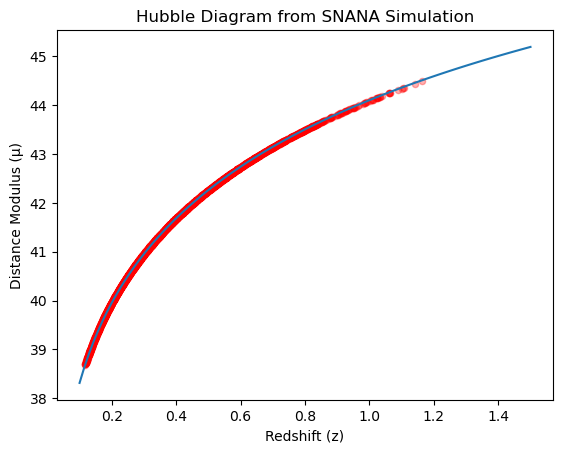

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your .DUMP file (adjust if needed)
dump_file = "SNANNA_first_data/myc21_practice_DES/myc21_practice_DES.DUMP"

# Read the file, skipping comment lines and splitting on whitespace
df = pd.read_csv(dump_file, comment="#", delim_whitespace=True)

# Show first few rows to confirm it loaded
print(df.head())
print(len(df), "rows loaded.")

# Rename columns if needed
df.columns = [col.upper() for col in df.columns]  # standardize caps

# Plot DLMAG (distance modulus) vs. ZCMB (redshift)
plt.scatter(df["ZCMB"], df["DLMAG"], s=20, color="red", alpha=0.3)
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.title("Hubble Diagram from SNANA Simulation")


# Constants
c = 2.998e5 # km/s
H0 = 70  # km/s/Mpc
Omega_M = 0.3
Omega_DE = 0.7
w = -1 

## USING SCIPY QUAD FUNCTION TO INTEGRATE ##

# Step 1: Define the function to integrate

def integrand(z):
    return 1 / np.sqrt(Omega_DE * (1 + z) ** (3 * (1 + w)) + Omega_M * (1 + z) ** 3)

# Step 2: Compute luminosity distance
# NOTE: return value in Mpc

def luminosity_distance(z):
    integral, error_est = quad(integrand, 0, z)
    return (c / H0) * (1 + z) * integral  # in Mpc

# Step 3: compute distance modulus
# Note the conversion factor 1e6 to convert Mpc to parsecs

def distance_modulus(z):
    DL_pc = luminosity_distance(z) * 1e6  # Convert to parsecs
    return 5 * np.log10(DL_pc / 10)

# Step 4: Define Limits of Integration 
z_values = np.linspace(0.1, 1.5, 100)

# Step 5: Command to compute integral 
mu = np.array([distance_modulus(z) for z in z_values])

## PLOTTING ##

# Plot results
plt.plot(z_values, mu, label=r'$\Omega_M=0.3, \Omega_\Lambda=0.7, w=-1$')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.show()
